In [3]:
# loading the library
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
pd.set_option('display.max_columns',None)

In [4]:
# loading the data
data=pd.read_csv(r"C:\Users\JEEVAN\Downloads\banking (1).csv")
data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
25751,46,blue-collar,married,basic.6y,no,yes,no,telephone,may,thu,39,22,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
15256,43,technician,divorced,professional.course,no,no,no,telephone,may,thu,644,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
17756,22,services,single,professional.course,no,yes,no,cellular,sep,thu,84,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,0
26961,37,technician,single,university.degree,no,yes,yes,cellular,aug,thu,73,2,4,1,success,-2.9,92.201,-31.4,0.873,5076.2,0
24355,39,services,married,basic.9y,no,no,no,telephone,may,wed,274,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
18750,45,blue-collar,married,basic.4y,no,no,no,telephone,may,thu,164,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
17725,29,student,single,high.school,no,yes,no,cellular,jul,thu,253,2,999,0,nonexistent,-2.9,92.469,-33.6,1.018,5076.2,1
32407,32,admin.,single,university.degree,no,yes,no,telephone,jul,mon,109,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
36969,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
32800,44,admin.,married,unknown,no,no,no,cellular,jul,fri,735,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,1


In [5]:
data.shape

(41188, 21)

In [3]:
# checking the null values in the data
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [5]:
len(data.columns)            # their are totally 21 variable

21

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [7]:
data.education.unique()        # it is a categorical variable where it has more categories we want to reduce it

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [8]:
data.education=np.where(data.education=='basic.4y','Basic',data.education)
data.education=np.where(data.education=='basic.9y','Basic',data.education)
data.education=np.where(data.education=='basic.6y','Basic',data.education)

In [9]:
data.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [10]:
# Dividing the data in to 2 parts to convert categorical variable in to dummies

In [13]:
data.describe(include='O').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [14]:
data.groupby('y').mean()        # y is the target variable (If the data is classification problem then we use logestic regression)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [15]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [16]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [18]:
# Categorical  variable
cat_vars=list(data.describe(include='O').columns)
cat_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [19]:
for var in cat_vars:
    #cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], drop_first=True, prefix=var)
    data1=data.join(cat_list)
    data=data1

In [17]:
data.columns        # where variable and dummies are shown so we are going to remove the categorical variable 

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day

In [20]:
data_vars=data.columns.values.tolist()
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'po

In [21]:
to_keep=[i for i in data_vars if i not in cat_vars]

In [22]:
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [24]:
len(to_keep)      # there are totally 52 variable

52

In [25]:
data_final1=data[to_keep]

In [26]:
data_final1

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [27]:
data_final1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [28]:
len(data_final1.columns.values)

52

In [25]:
data_final1.to_csv('data_final1.csv')

In [29]:
data_final1.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
# performing the SMOTE operation
data_final1.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [28]:
# we want to perform the SMOTE operation because their is a unbalance class in the data  where the unbalance is huge so we want to perform only on train data so we want to split the data
# If we want to split the data in to train and test data, first we want to seperate the traget variable and predictor variable to perform the spliting operation
# Now we are going to seperate the data in to predictive variable and target variable

In [33]:
x=data_final1.loc[:,data_final1.columns !='y']       # predictive variable 
y=data_final1.loc[:,data_final1.columns =='y']       # Traget variable

In [34]:
y.value_counts()

y
0    36548
1     4640
dtype: int64

In [35]:
# spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
# oversampling to be done for the train data only

In [37]:
# 1st join the x_train,y_train
train=x_train.join(y_train)

In [38]:
train.shape

(28831, 52)

In [39]:
not_subsc=train[train.y==0]
print('not_subsc =',len(not_subsc))
subsc=train[train.y==1]
print('subsc =',len(subsc))

not_subsc = 25567
subsc = 3264


In [40]:
# 2nd upsample; minor catg 'subsc' to be increased to the counts =not_subsc

In [41]:
from sklearn.utils import resample
subsc_os =resample(subsc,replace=True,n_samples=len(not_subsc),random_state=27)

In [42]:
train_os=pd.concat([not_subsc,subsc_os])

In [43]:
train_os.y.value_counts()

0    25567
1    25567
Name: y, dtype: int64

In [44]:
#3rd make x_trainos,y_trainos

In [45]:
x_trainos1=train_os.loc[:,train_os.columns !='y']
y_trainos1=train_os.loc[:,train_os.columns =='y']

In [46]:
# recursive feature elimination

In [47]:
# now will work on model
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt
plt.rc('font',size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
pd.set_option('display.max_columns',None)
from imblearn.over_sampling import SMOTE     #imblearn (immbalance learn)

In [45]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [46]:
logreg=LogisticRegression()

In [48]:
rfe=RFE(logreg,n_features_to_select=20)
rfe=rfe.fit(x_trainos1,y_trainos1.values.ravel())

In [78]:
rfe.n_features_to_select
x_trainos1.columns[rfe.get_support()]

Index(['previous', 'emp_var_rate', 'euribor3m', 'job_retired', 'job_student',
       'job_unknown', 'education_high.school', 'education_university.degree',
       'default_unknown', 'month_aug', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [51]:
cols=x_trainos1.columns[rfe.get_support()]

In [52]:
cols.to_list()

['previous',
 'emp_var_rate',
 'euribor3m',
 'job_retired',
 'job_student',
 'job_unknown',
 'education_high.school',
 'education_university.degree',
 'default_unknown',
 'month_aug',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [53]:
x1=x_trainos1[cols]
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51134 entries, 31880 to 15869
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   previous                     51134 non-null  int64  
 1   emp_var_rate                 51134 non-null  float64
 2   euribor3m                    51134 non-null  float64
 3   job_retired                  51134 non-null  uint8  
 4   job_student                  51134 non-null  uint8  
 5   job_unknown                  51134 non-null  uint8  
 6   education_high.school        51134 non-null  uint8  
 7   education_university.degree  51134 non-null  uint8  
 8   default_unknown              51134 non-null  uint8  
 9   month_aug                    51134 non-null  uint8  
 10  month_jul                    51134 non-null  uint8  
 11  month_jun                    51134 non-null  uint8  
 12  month_mar                    51134 non-null  uint8  
 13  month_may   

In [54]:
y_trainos1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51134 entries, 31880 to 15869
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       51134 non-null  int64
dtypes: int64(1)
memory usage: 799.0 KB


In [80]:
y_trainos1.y.value_counts()

0    25567
1    25567
Name: y, dtype: int64

In [56]:
y1=y_trainos1.y

In [57]:
y1

31880    0
38177    0
2459     0
756      0
11275    0
        ..
1030     1
2850     1
34405    1
30366    1
15869    1
Name: y, Length: 51134, dtype: int64

In [60]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.548259
         Iterations 7
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.209     
Dependent Variable:      y                   AIC:                 56109.3482
Date:                    2022-01-12 05:43    BIC:                 56286.1923
No. Observations:        51134               Log-Likelihood:      -28035.   
Df Model:                19                  LL-Null:             -35443.   
Df Residuals:            51114               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
previ

In [61]:
# now sklearn

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
from sklearn import metrics

In [64]:
logreg=LogisticRegression(solver='sag')
logreg.fit(x1,y1)

LogisticRegression(solver='sag')

In [65]:
# x_test should also have 20 features

In [66]:
x_test20=x_test[cols]

In [67]:
y_pred=logreg.predict(x_test20)

In [68]:
print('accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test20,y_test)))

accuracy of logistic regression classifier on test set: 0.80


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[8932 2049]
 [ 451  925]]


In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [74]:
logit_roc_auc=roc_auc_score(y_test,logreg.predict(x_test20))                #ROC[reciver operating characteristic]  AUC[area under curve]
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(x_test20)[:,1])

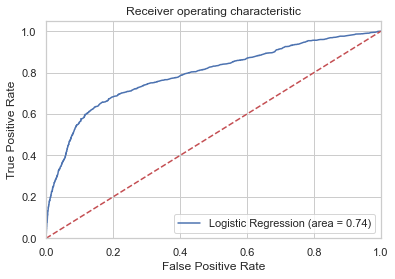

In [76]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()